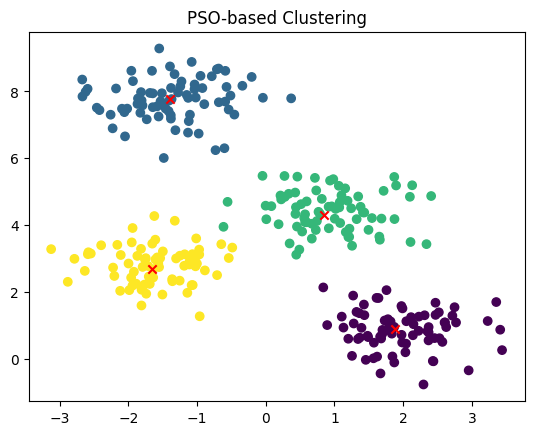

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# PSO parameters
num_particles = 30
num_iterations = 100
num_clusters = 4
w = 0.5       # inertia weight
c1 = 1.5      # cognitive coefficient
c2 = 1.5      # social coefficient

# Initialize particles
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        self.position = data[np.random.choice(range(len(data)), num_clusters)]
        self.velocity = np.zeros_like(self.position)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        closest = np.argmin(distances, axis=1)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2 for i in range(len(self.data)))
        return score

    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social
        self.position += self.velocity
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# Initialize swarm
swarm = [Particle(data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position

# PSO loop
for _ in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position

# Final clustering
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(global_best[:, 0], global_best[:, 1], c='red', marker='x')
plt.title("PSO-based Clustering")
plt.show()




'''
Absolutely 👍 — here’s a **clear, step-by-step explanation** of your **Particle Swarm Optimization (PSO) based clustering** code, just like the previous one.

It’s written so that you can confidently explain it to your ma’am — including how it works internally and what the output means.

---

## 🧠 **Goal of the Code**

This code performs **clustering using Particle Swarm Optimization (PSO)**.
Instead of using traditional clustering algorithms like K-Means, it uses **PSO**, which is a **Swarm Intelligence optimization technique** inspired by the behavior of birds or fish searching for food.

Each **particle** in the swarm represents a possible set of cluster centers.
Over time, these particles move and adjust themselves to find the **best clustering arrangement** (i.e., positions of cluster centers that minimize total distance of points to their nearest center).

---

## 🧩 **Step-by-Step Explanation**

---

### **Step 1: Import Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
```

✅ **Explanation:**

* **NumPy:** For numerical operations (arrays, distances, etc.)
* **Matplotlib:** For plotting results.
* **make_blobs:** Generates sample data for testing clustering algorithms (acts like artificial dataset).

---

### **Step 2: Generate Synthetic Data**

```python
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
```

✅ **Explanation:**

* Creates **300 data points** distributed around **4 cluster centers**.
* `cluster_std=0.60` controls how spread out each cluster is.
* `random_state=0` ensures reproducibility (same results every time).

💡 The generated `data` is a 2D array — each row represents a point `(x, y)`.

You can visualize it like this:

> 4 groups of points scattered across a 2D plane.

---

### **Step 3: Set PSO Parameters**

```python
num_particles = 30
num_iterations = 100
num_clusters = 4
w = 0.5
c1 = 1.5
c2 = 1.5
```

✅ **Explanation:**

| Parameter        | Meaning                                                       |
| ---------------- | ------------------------------------------------------------- |
| `num_particles`  | Number of particles (possible solutions)                      |
| `num_iterations` | Number of optimization steps                                  |
| `num_clusters`   | How many clusters we want (same as K-Means `k`)               |
| `w`              | Inertia weight (controls momentum of movement)                |
| `c1`             | Cognitive coefficient (influence of particle’s personal best) |
| `c2`             | Social coefficient (influence of global best particle)        |

🧠 **Concept:**
Each particle “flies” in the search space and updates its position (cluster centers) based on:

1. Its own best known position.
2. The best position found by the entire swarm.

---

### **Step 4: Define the Particle Class**

```python
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        self.position = data[np.random.choice(range(len(data)), num_clusters)]
        self.velocity = np.zeros_like(self.position)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()
```

✅ **Explanation:**

* Each **Particle** represents one **possible clustering solution**.
* `self.position` → Cluster centers (randomly selected from data points)
* `self.velocity` → How fast and in what direction the centers move.
* `self.best_position` → Best cluster centers this particle has found so far.
* `self.best_score` → Quality of that clustering (lower is better).

---

### **Step 5: Define the Evaluation Function**

```python
def evaluate(self):
    distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
    closest = np.argmin(distances, axis=1)
    score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]])**2 for i in range(len(self.data)))
    return score
```

✅ **Explanation:**

* Computes **how good the current clustering is**.
* For each data point:

  * Find the nearest cluster center.
  * Compute the squared distance.
* **Score = total sum of squared distances.**
* **Lower score → better clustering.**

💡 It’s similar to the **K-Means objective function**.

---

### **Step 6: Particle Update Rule**

```python
def update(self, global_best):
    r1, r2 = np.random.rand(), np.random.rand()
    cognitive = c1 * r1 * (self.best_position - self.position)
    social = c2 * r2 * (global_best - self.position)
    self.velocity = w * self.velocity + cognitive + social
    self.position += self.velocity
    score = self.evaluate()
    if score < self.best_score:
        self.best_score = score
        self.best_position = np.copy(self.position)
```

✅ **Explanation:**
This is where **PSO learning happens**.

| Term        | Meaning                                                   |
| ----------- | --------------------------------------------------------- |
| `r1`, `r2`  | Random values between 0–1 for randomness.                 |
| `cognitive` | Pulls the particle toward its own best position.          |
| `social`    | Pulls the particle toward the global best found by swarm. |
| `velocity`  | Updated using inertia, personal best, and global best.    |
| `position`  | Moved according to the velocity.                          |

📘 **If new position is better**, update its `best_position` and `best_score`.

This simulates how birds or fishes move together toward the best food source.

---

### **Step 7: Initialize the Swarm**

```python
swarm = [Particle(data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position
```

✅ **Explanation:**

* Creates a list of `num_particles` particles.
* Finds which particle currently has the **lowest score** (best clustering).
* Sets its cluster centers as the **global best**.

---

### **Step 8: Main PSO Loop**

```python
for _ in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position
```

✅ **Explanation:**

* Repeat for 100 iterations:

  * Each particle moves (updates position).
  * After all particles move, find the new **global best**.
* Over time, the particles converge — meaning most of them agree on good cluster centers.

💡 Think of it like:

> “Birds searching food — over time, they all fly toward the best location.”

---

### **Step 9: Final Clustering**

```python
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)
```

✅ **Explanation:**

* After optimization, `global_best` contains the **final cluster centers**.
* Each data point is assigned to the **nearest cluster**.

---

### **Step 10: Visualization**

```python
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(global_best[:, 0], global_best[:, 1], c='red', marker='x')
plt.title("PSO-based Clustering")
plt.show()
```

✅ **Explanation:**

* Plots all data points in 2D.
* Points are colored by their cluster assignment.
* Red X’s mark the **final cluster centers** found by PSO.

---

## 🧾 **Understanding the Output**

When you run the code, you’ll see a plot like this (example):

🟢🟣🟡🔵 → Data points colored by cluster
❌ (red X’s) → Final PSO-optimized cluster centers

✅ **Interpretation:**

* PSO successfully grouped similar points together.
* The red X’s show where PSO thinks the cluster centers should be.
* It looks very similar to K-Means — but PSO may find better clusters in more complex cases.

---

## 🧠 **Summary for Oral Explanation**

You can confidently say:

> “This code uses Particle Swarm Optimization to perform clustering.
> Each particle represents possible cluster centers.
> The particles move around based on their own best experience and the swarm’s global best solution.
> After several iterations, they converge to the best cluster centers that minimize the total distance between points and their nearest center.
> Finally, we plot the clustered data with the optimized centers shown as red crosses.”

---


'''
